In [1]:
import numpy as np
import tensorflow as tf
np.random.seed(0)
tf.random.set_seed(0)

In [2]:
from tensorflow.keras.datasets import mnist
(X_tn0, y_tn0), (X_te0, y_te0) = mnist.load_data()

In [3]:
print(X_tn0.shape)
print(y_tn0.shape)
print(X_te0.shape)
print(y_te0.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


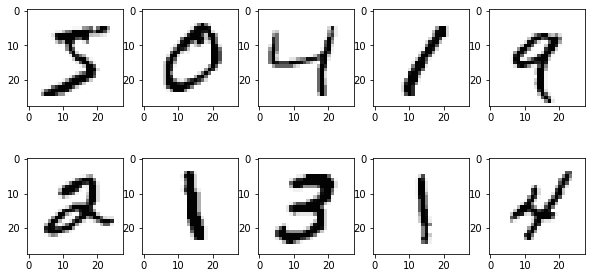

In [4]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10, 5))
for i in range(2*5):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_tn0[i].reshape((28, 28)), 
                cmap='Greys')
plt.show()

In [5]:
set(y_tn0)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [6]:
X_tn_re = X_tn0.reshape(60000, 28, 28, 1)
X_tn = X_tn_re/255 # 이미지 픽셀값의 최댓값이 1이 되도록 설정
print(X_tn.shape)
X_te_re = X_te0.reshape(10000, 28, 28, 1)
X_te = X_te_re/255 #
print(X_te.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [7]:
from tensorflow.keras.utils import to_categorical
y_tn = to_categorical(y_tn0)
y_te = to_categorical(y_te0)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

n_class = len(set(y_tn0))

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                    input_shape=(28, 28, 1),
                    padding='valid',
                    activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, kernel_size=(3, 3),
                     padding='valid',
                     activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_class, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [10]:
hist = model.fit(X_tn, y_tn, epochs=3, batch_size=100)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 20s 340us/sample - loss: 0.2275 - accuracy: 0.9291
Epoch 2/3
60000/60000 [==============================] - 22s 372us/sample - loss: 0.0722 - accuracy: 0.9771
Epoch 3/3
60000/60000 [==============================] - 19s 323us/sample - loss: 0.0541 - accuracy: 0.9831


In [11]:
print(model.evaluate(X_tn, y_tn)[1])

60000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [12]:
print(model.evaluate(X_te, y_te)[1])

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [13]:
# 오답 데이터 확인
y_pred_hot = model.predict(X_te)
print(y_pred_hot[0])

[8.5380591e-09 1.7337604e-07 8.1775524e-06 5.3891381e-06 1.9158517e-09
 6.5124324e-09 4.7294421e-12 9.9998415e-01 3.2554357e-07 1.7660457e-06]


In [14]:

import numpy as np 
y_pred = np.argmax(y_pred_hot, axis=1) # 원핫 인코딩 원래 숫자로 변환
print(y_pred)

[7 2 1 ... 4 5 6]


In [15]:
diff = y_te0 - y_pred
diff_idx = []
y_len = len(y_te0)
for i in range(0, y_len):
    if(diff[i] != 0):
        diff_idx.append(i)

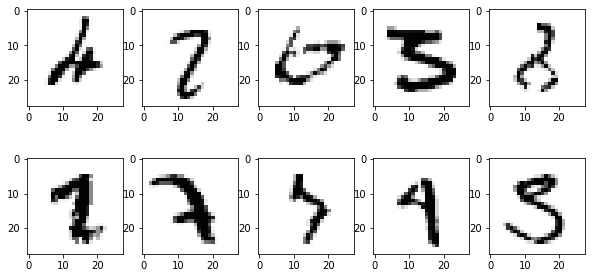

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5)) 
for i in range(2 * 5):
    plt.subplot(2, 5, i+1)
    raw_idx = diff_idx[i]
    plt.imshow(X_te0[raw_idx].reshape((28, 28)),
                cmap='Greys')

plt.show()